## Parkinsons Dataset

**Source:**

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

**Data Set Information:**

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.

**Attribute Information:**

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [1]:
%matplotlib inline
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("parkinsons_data.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("parkinsons_data.csv")

# Separate features (X) and target (y)
X = df.drop(columns=["status"])  # independent variables
y = df["status"]                # target variable (0 = healthy, 1 = Parkinson's)

# Combine for quick view (optional)
df_clean = pd.concat([X, y.rename("status")], axis=1)

# Display first 5 rows to verify
df_clean.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [3]:
# Display dataset info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe()

Dataset Shape: (195, 24)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


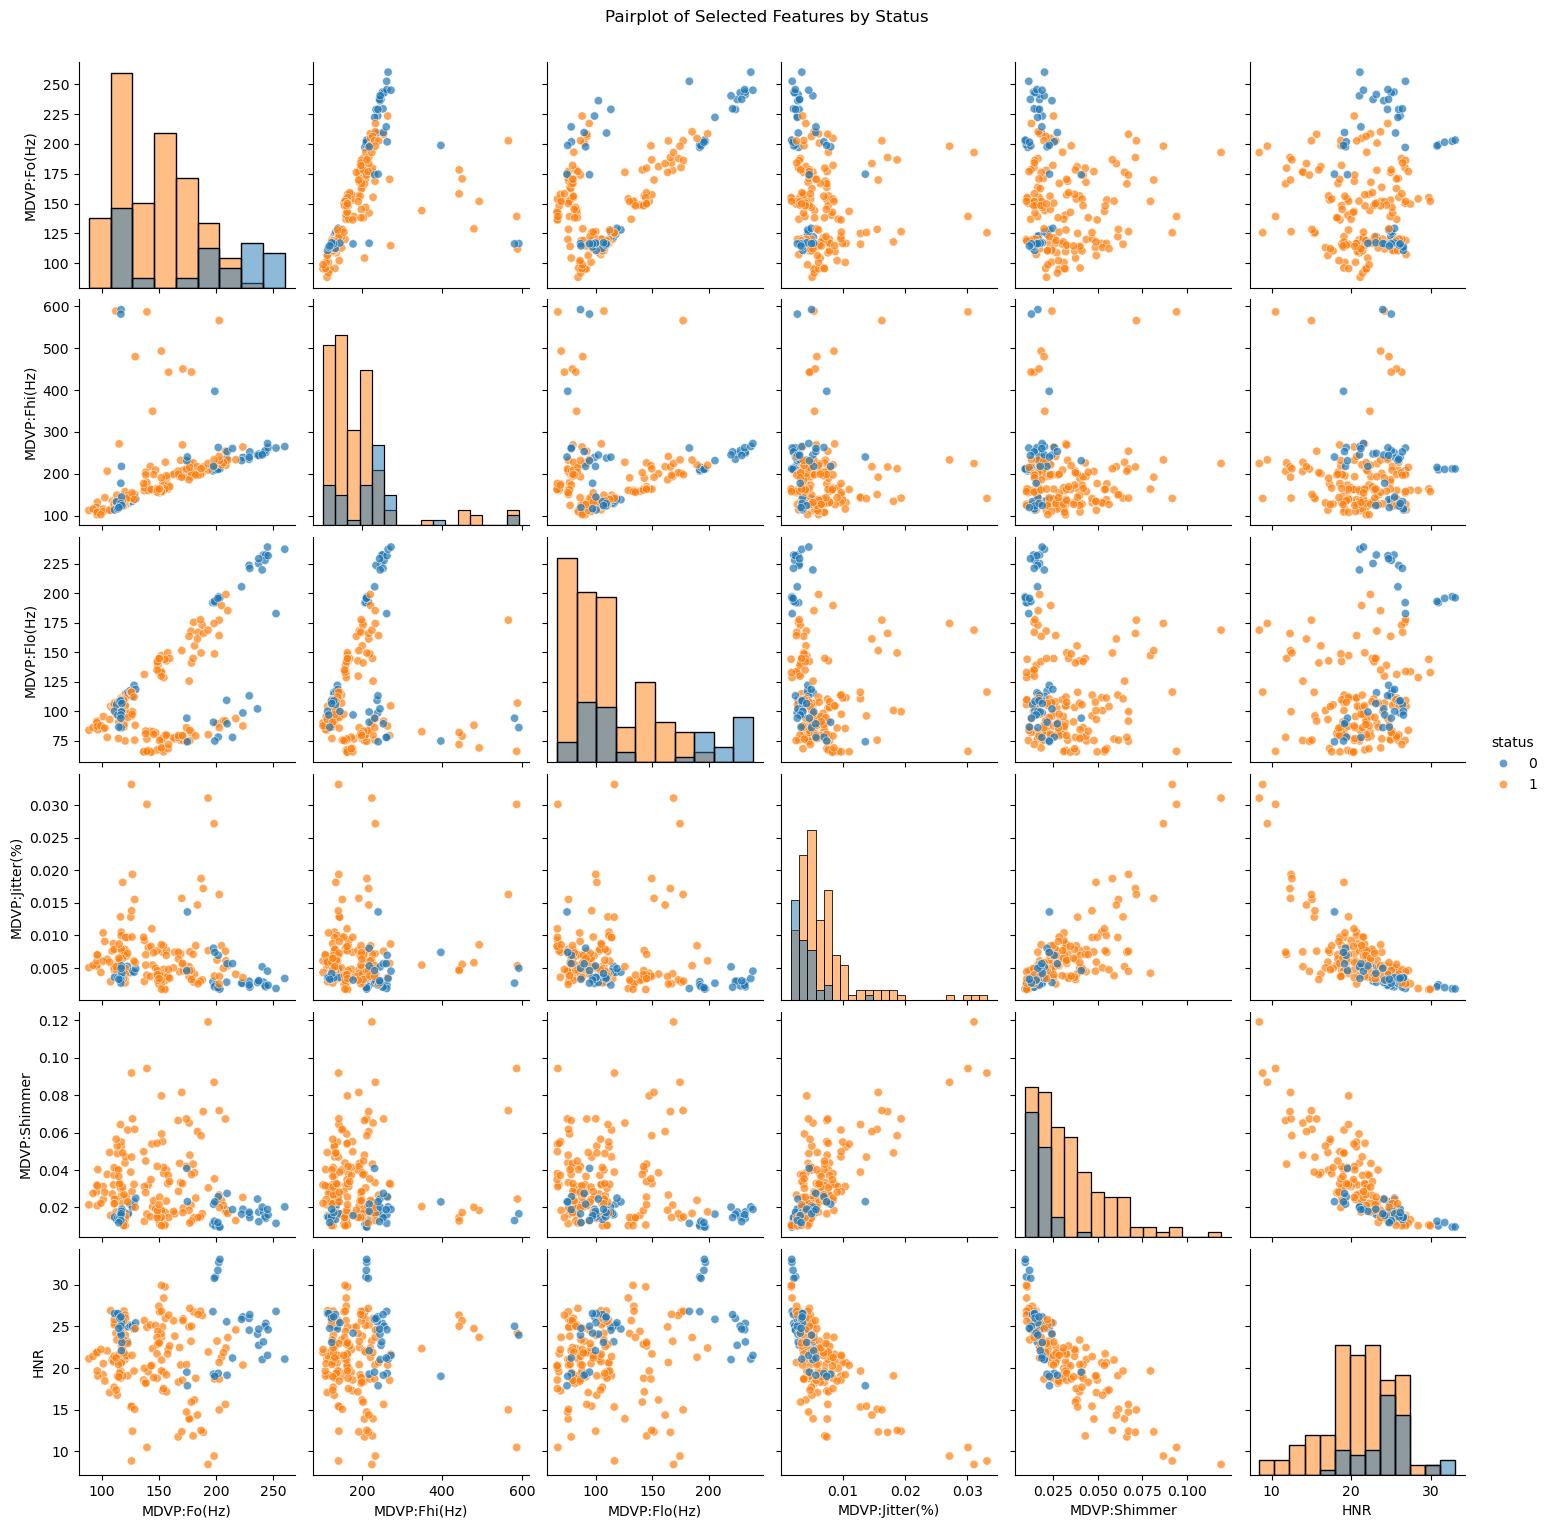

In [4]:
# Pairplot visualisation for Parkinson's classification dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Select some important numeric features + status
selected_cols = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Shimmer", "HNR", "status"]

# Ensure selected columns are numeric (convert if needed)
df_pair = df[selected_cols].apply(pd.to_numeric, errors='coerce')

# Pairplot with hue = status to show separation
sns.pairplot(df_pair, hue="status", diag_kind="hist", plot_kws={'alpha':0.7})
plt.suptitle("Pairplot of Selected Features by Status", y=1.02)
plt.show()

## Question 1

From the scatterplot/pairplot above which two features seem most useful for separating?

Looking at the pairplot, `MDVP:Fo(Hz)` (average vocal fundamental frequency) and `HNR` (harmonics-to-noise ratio) show a noticeable difference between the two classes.  
- Parkinson’s patients generally have lower `HNR` values, indicating a noisier voice signal.  
- They also tend to have slightly lower `MDVP:Fo(Hz)` values compared to healthy individuals.  

These two features, combined with others like `MDVP:Jitter(%)` and `MDVP:Shimmer`, seem to provide good separation and may be strong predictors for classification models such as Logistic Regression and Random Forest.

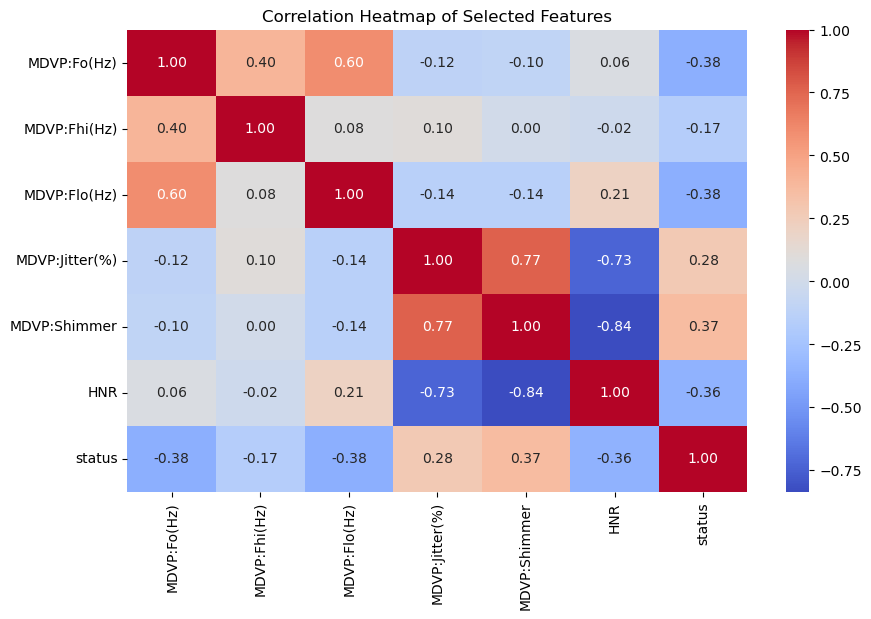

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for selected numeric features
corr_matrix = df[selected_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

### Question 2: Looking at the correlation heatmap above, which features are most strongly correlated with `status`? What might this imply?  

From the heatmap, `MDVP:Jitter(%)` and `MDVP:Shimmer` have the strongest positive correlation with `status`.  
This implies that as `status` changes from 0 (healthy) to 1 (Parkinson’s), both jitter and shimmer values tend to increase.  
In other words, Parkinson’s patients generally exhibit more voice frequency and amplitude variations (higher jitter and shimmer), which aligns with the clinical symptoms of Parkinson’s disease.

In [9]:
# Import train_test_split

if 'name' in df.columns:
    df = df.drop(columns=['name'])

# Separate features and target
X = df.drop(columns=["status"])  # 'status' = 1 (Parkinson's), 0 (healthy)
y = df["status"]

# Ensure no non-numeric columns remain
print("Non-numeric columns left in X:", X.select_dtypes(exclude='number').columns.tolist())

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Non-numeric columns left in X: []
Training samples: 136
Test samples: 59


### Question3: 

Why split the dataset into training and testing dataset?

We split the dataset into training and testing sets to evaluate how well our model performs on unseen data. The training set is used to teach the model, while the testing set checks its ability to generalize. This helps prevent overfitting and ensures the model makes reliable predictions on new data.


 Logistic Regression Results:
Accuracy: 0.847457627118644

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.89      0.91      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.84      0.85      0.85        59



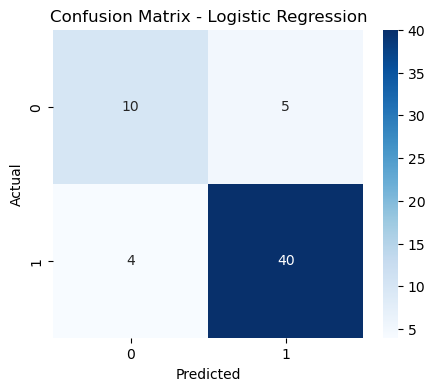

In [12]:
#Logistic Regression model
log_reg = LogisticRegression(max_iter=200, solver='liblinear')  # liblinear is good for small binary datasets
log_reg.fit(X_train, y_train)

#Make predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluate model
print("\n Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Question 4: Why does Logistic Regression assume a linear decision boundary?
Logistic Regression models the probability of a categorical outcome using the logistic (sigmoid) function applied to a linear combination of features.
This creates a linear decision boundary in the feature space because the model predicts a class based on whether the linear combination of inputs crosses a threshold (typically 0.5)

## Question 5: Does this assumption hold for the Parkinson’s dataset? Why or why not?
Logistic Regression assumes that the classes can be separated by a linear decision boundary, meaning it tries to find a straight line (or hyperplane in higher dimensions) that best separates the two classes. In the case of the Parkinson’s dataset, this assumption only partially holds true. While some of the features such as jitter, shimmer, and HNR show clear differences between healthy and Parkinson’s patients, the relationships among all features are not perfectly linear.

Accuracy (Random Forest): 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



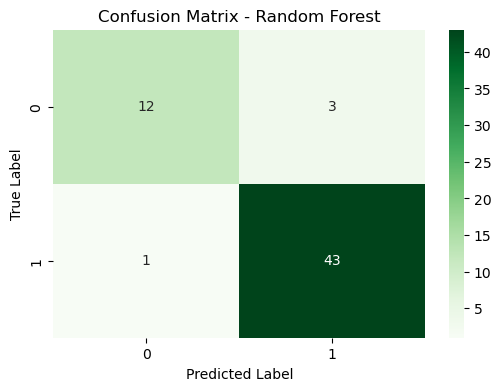

In [11]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate model
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Question 6: If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Increasing n_estimators generally improves the stability and accuracy of the Random Forest model.
More trees reduce the effect of randomness in individual trees, making predictions less sensitive to noise and improving generalization.
However, after a certain point, adding more trees gives diminishing returns and increases computation time without significant improvement.

## Question 7: Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Random Forest performed better than Logistic Regression on the Parkinson’s dataset. This is likely because Logistic Regression assumes a linear decision boundary, while Random Forest can capture non-linear relationships and feature interactions, making it more suitable for this dataset.

## Question 8: If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

Random Forest would likely generalize better on a larger, noisier dataset because it reduces variance through ensemble averaging and is less sensitive to irrelevant or noisy features. Logistic Regression might overfit or underfit if the data relationships are highly non-linear.